# Questions to Answer:
- Analysis of the gross of a movie vs directors.
- Analysis of the gross of a movie vs different - different stars.
- Analysis of the No_of_votes of a movie vs directors.
- Analysis of the No_of_votes of a movie vs different - different stars.
- Which actor prefer which Genre more?
- Which combination of actors are getting good IMDB_Rating maximum time?
- Which combination of actors are getting good gross?

In [11]:

# Load imports needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

import requests
import json
from config import api_key
from pprint import pprint

In [2]:
# Create file path for csv
file_path = './Resources/imdb_top_1000.csv'

# Read csv in as a dataframe
movie_df = pd.read_csv(file_path)

# Display movie dataframe
movie_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Examine dataframe for data types and contents
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# Determine the number of missing values in dataframe
movie_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
# Seperate genre into multiple columns for possible future analysis
movie_df[['Genre 1','Genre 2','Genre 3']]= movie_df['Genre'].str.split(',', expand=True)

# Display dataframe
movie_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre 1,Genre 2,Genre 3
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama,None,None
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime,Drama,None
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action,Crime,Drama
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Crime,Drama,None
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Crime,Drama,None


In [6]:
# Create a data frame of the titles that are missing gross figures
missing_gross_movies = movie_df[movie_df['Gross'].isnull()==True]

# Display the dataframe
missing_gross_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre 1,Genre 2,Genre 3
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN,Biography,Drama,History
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN,Drama,None,None
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN,Action,Drama,Mystery
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN,Drama,Family,Fantasy
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN,Animation,Drama,War


In [7]:
# Create a url for the omdb API
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=" + api_key

In [8]:
# Loop to examine gross values for the titles currently missing this figure
for title in missing_gross_movies['Series_Title']:
    try:
        response = requests.get(url + title.lower() + api_key).json
        print(f'The gross for {title} is {int(response['BoxOffice'].strip('$').replace(',',''))}')

    except:
        print(f'No data on {title}')

No data on Hamilton
No data on Soorarai Pottru
No data on Seppuku
No data on It's a Wonderful Life
No data on Hotaru no haka
No data on Ayla: The Daughter of War
No data on Vikram Vedha
No data on Anand
No data on Tengoku to jigoku
No data on Paths of Glory
No data on Sunset Blvd.
No data on Tumbbad
No data on Drishyam
No data on Miracle in cell NO.7
No data on Babam ve Oglum
No data on Idi i smotri
No data on K.G.F: Chapter 1
No data on Klaus
No data on Gangs of Wasseypur
No data on Hera Pheri
No data on Eskiya
No data on Andaz Apna Apna
No data on Höstsonaten
No data on The Message
No data on Sholay
No data on To Kill a Mockingbird
No data on Yôjinbô
No data on Judgment at Nuremberg
No data on Smultronstället
No data on Det sjunde inseglet
No data on Tôkyô monogatari
No data on To Be or Not to Be
No data on Koe no katachi
No data on Contratiempo
No data on Soul
No data on Ôkami kodomo no Ame to Yuki
No data on A Wednesday
No data on Hachi: A Dog's Tale
No data on Mary and Max
No data

In [9]:
# Examine the average ratings by genre 
rating_by_genre_df = movie_df.groupby('Genre')['IMDB_Rating'].mean().reset_index().sort_values(by=['IMDB_Rating'], ascending=False)

# Distile ratings down to the top ten 
top_ten_rating_by_genre = rating_by_genre_df.head(10)

# Display the top ten genres by rating
top_ten_rating_by_genre

,Genre,IMDB_Rating
80,"Animation, Drama, War",8.50
166,"Drama, Musical",8.40
34,"Action, Sci-Fi",8.40
171,"Drama, Mystery, War",8.35
201,Western,8.35
127,"Crime, Drama, Music",8.30
197,"Mystery, Romance, Thriller",8.30
59,"Adventure, Mystery, Thriller",8.30
144,"Drama, Fantasy, Horror",8.30
116,"Comedy, Musical, Romance",8.30


<Axes: xlabel='IMDB_Rating', ylabel='Genre'>

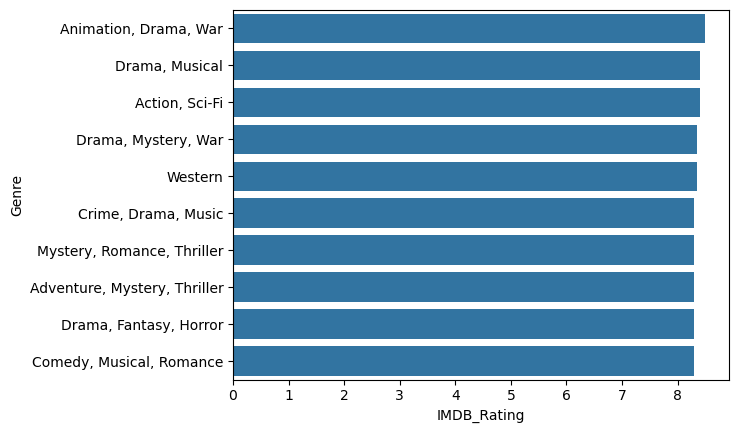

In [23]:
sns.barplot(top_ten_rating_by_genre, y="Genre", x="IMDB_Rating", orient='h')

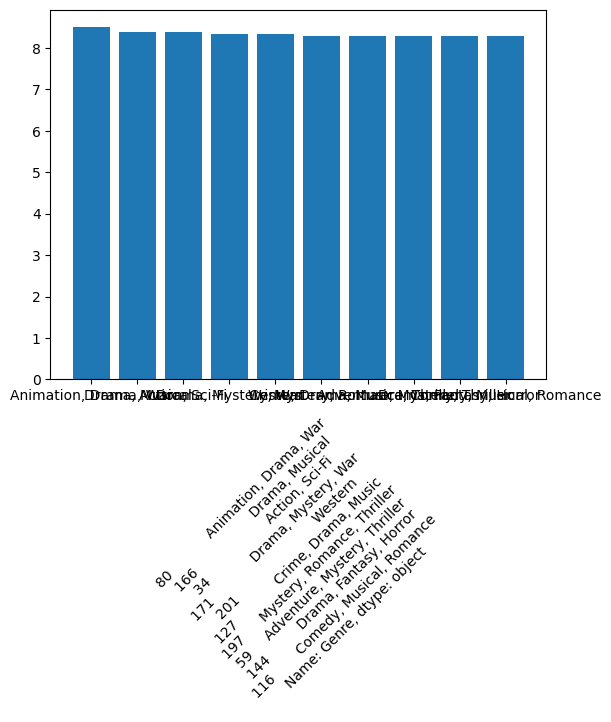

In [26]:
# Create a plot of the genres by rating
fig, ax = plt.subplots()
ax.bar(top_ten_rating_by_genre['Genre'], top_ten_rating_by_genre['IMDB_Rating'])

# Display the plot
plt.show()

In [29]:
movie_df['Gross'] = movie_df['Gross'].str.replace(',', '').astype(float)

In [31]:
# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)


movie_df.groupby('Director')['Gross'].mean().reset_index().sort_values(by='Gross', ascending=False).head(20)

,Director,Gross
36,Anthony Russo,551259850.75
148,Gareth Edwards,532177324.00
195,J.J. Abrams,474390301.67
261,Josh Cooley,434038008.00
428,Roger Allers,422783777.00
496,Tim Miller,363070709.00
205,James Gunn,361494850.50
202,James Cameron,349647320.40
66,Byron Howard,341268248.00
107,David Yates,326317907.00
